<a href="https://colab.research.google.com/github/justcme/PerformanceSpecs/blob/main/J_BoxWhiskCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf/from_Pandas")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import index
import pathlib
from textwrap import wrap

# DATA

In [ ]:
errorL1 = pd.read_csv("Old_Criteria/Error/errorcL.csv")
errorL2 = pd.read_csv("New_Criteria/Error/errorL.csv") 
errorN1 = pd.read_csv("Old_Criteria/Error/errorN.csv") 
errorN2 = pd.read_csv("New_Criteria/Error/errorN.csv") 

In [ ]:
errorL1

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
0,1,old,0.0,BV,6.6,6.0,6.3,6.2,6.4,6.2,...,6.4,6.0,6.4,6.0,6.6,6.5,6.0,6.9,5.5,6.303846
1,2,old,0.1,CV,3.7,3.4,3.4,3.4,3.6,3.4,...,3.5,3.5,3.3,3.4,3.6,3.4,3.3,3.8,2.9,3.411538
2,3,old,0.2,BV + CV,7.0,7.2,7.2,7.3,7.2,6.0,...,6.9,6.6,7.0,6.7,7.3,7.2,6.9,7.7,6.0,7.088462
3,4,old,1.1,PB1 + CV,7.0,7.0,7.2,6.9,7.1,6.9,...,7.1,6.9,7.2,7.2,7.2,6.9,7.0,7.3,6.7,7.051923
4,5,old,1.2,PB1 + BV + CV,9.3,9.9,9.6,9.1,9.6,8.8,...,9.5,9.4,9.1,9.4,9.7,9.6,9.3,10.1,8.8,9.511538
5,6,old,2.1,PB2 + CV,5.4,5.1,5.2,5.1,5.2,5.3,...,5.4,5.3,5.3,4.9,5.3,5.3,5.1,5.6,4.9,5.228846
6,7,old,2.2,PB2 + BV + CV,7.5,7.9,7.7,7.5,7.6,7.2,...,8.0,7.5,7.5,7.4,7.6,7.8,7.6,8.1,7.1,7.628846


In [ ]:
sliced = errorL1.iloc[:,3:54]
long = sliced.T
#long.columns = long['Error Added']
long = long.iloc[1:,:]
long[long.iloc[:,2]<6.5]

,0,1,2,3,4,5,6
ReClassd_6,6.2,3.4,6.0,6.9,8.8,5.3,7.2


In [ ]:
sliced2 = errorN1.iloc[:,3:54]
long2 = sliced2.T
#long.columns = long['Error Added']
long2 = long2.iloc[1:,:]
long2.head()

,0,1,2,3,4,5,6
ReClassd_1,5.9,3.3,6.3,6.4,8.2,4.8,6.8
ReClassd_2,5.1,2.7,6.4,5.9,8.6,4.6,7.3
ReClassd_3,5.5,2.9,6.2,6.2,8.5,4.7,6.9
ReClassd_4,5.6,3.2,6.5,6.1,8.4,4.3,6.8
ReClassd_5,5.9,3.1,6.6,6.3,8.7,4.6,7.0


<Axes: xlabel='2', ylabel='Count'>

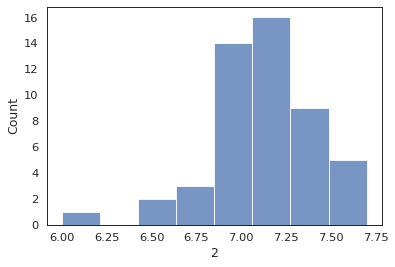

In [ ]:
sns.histplot(data = long, x = 2)

<Axes: xlabel='2', ylabel='Count'>

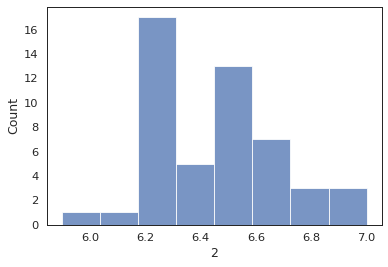

In [ ]:
sns.histplot(data = long2, x = 2)

# FUNCTIONS

In [ ]:
def LongError(df1,df2):
  reclass = list(df1.columns)
  del reclass[0:3]
  del reclass[-1]
  df1_long = pd.melt(df1, id_vars=['Scenario', 'Error Added', 'Criteria'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)
  df2_long = pd.melt(df2[1:], id_vars=['Scenario', 'Error Added', 'Criteria'], value_vars= reclass, value_name= 'Reclassified (%)', ignore_index = True)
  df_long = pd.concat([df1_long, df2_long], join = "outer", ignore_index=True)
  return df_long

In [ ]:
def BoxWhisk(df, param, letter):
  sns.set_theme(context = 'paper', style="white", font_scale = 1.5)
  fig, ax = plt.subplots(figsize = (12,8), tight_layout=True)
  sns.diverging_palette(220, 20, as_cmap = True)
  
  sns.boxplot(data=df, x="Error Added",order = ['CV', 'PB1 + CV','PB2 + CV', 'BV', 'BV + CV','PB1 + BV + CV','PB2 + BV + CV'], width = 0.5, y="Reclassified (%)", hue="Criteria", ax=ax)
  #plt.title('Total Reclassifications Given Old vs New Criteria: '+param, fontsize = 15)
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
  

  labels = ['BV only','Scenario 1 No Bias', 'Scenario 2 Positive Bias', 'Scenario 3 Negative Bias', 'Scenario 1 No Bias', 'Scenario 2 Positive Bias', 'Scenario 3 Negative Bias']
  labels1 = ['\n'.join(wrap(l, 11)) for l in [labels[1],labels[4]]]
  labels2 = ['\n'.join(wrap(l, 15)) for l in [labels[2],labels[3],labels[5],labels[6]]]
  labels = [labels1[0], labels2[0], labels2[1], labels[0], labels1[1], labels2[2], labels2[3]]
  ax.set_xticklabels(labels)

  ax.set_xlabel('Error Added',labelpad = 40)
  ax.set_ylabel('Misclassified (%)')
  ax.set_yticks([3,4,5,6,7,8,9,10])
  ax.set_ylim(ymax=10.5, auto = False)

  trans = ax.get_xaxis_transform()
  ax.annotate("Without BV", xy=(1.1, -.19), xycoords=trans, ha="center", va="top")
  ax.plot([0.1,2.1],[-.17,-.17], color="k", transform=trans, clip_on=False)
  ax.annotate("With BV", xy=(4.5, -.19), xycoords=trans, ha="center", va="top")
  ax.plot([3,6],[-.17,-.17], color="k", transform=trans, clip_on=False)

  ax.legend(title = 'Criteria', loc = 'upper left')

  fig = plt.gcf()
  fig.savefig('Figures/BoxWhisk' +letter +'in_ftn.jpg', dpi = 600)
  return (fig, 'BoxWhisk' +letter +'.jpg')

#CALL FUNCTIONS

In [ ]:
errorL_long = LongError(errorL1, errorL2)
errorN_long = LongError(errorN1, errorN2)

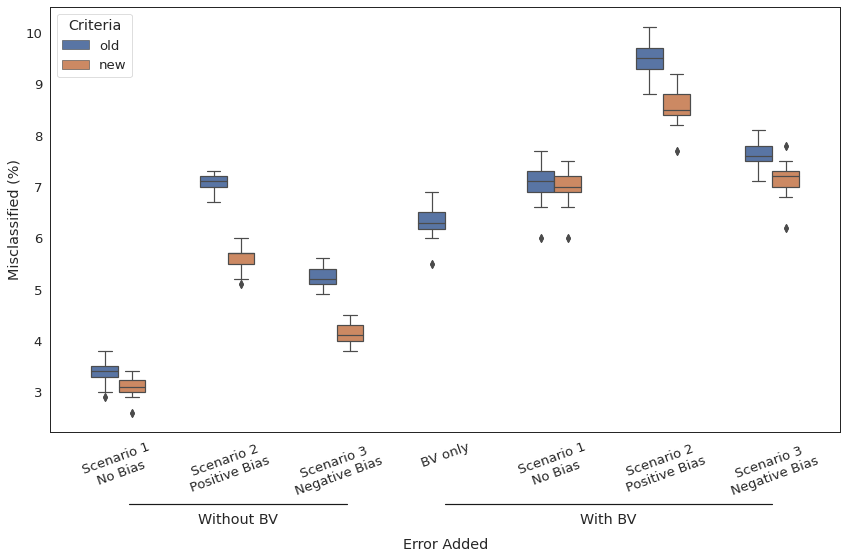

In [ ]:
L_boxwhisk = BoxWhisk(errorL_long, 'LDL-C', 'L')

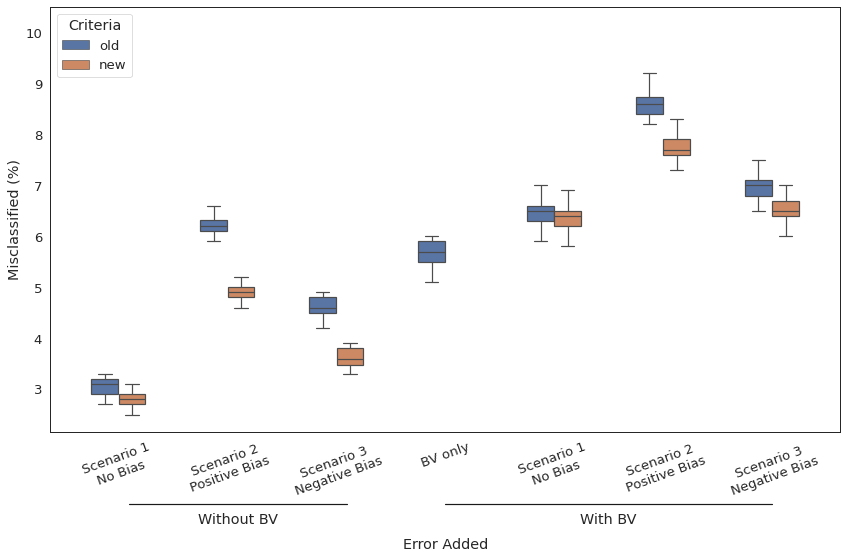

In [ ]:
N_boxwhisk = BoxWhisk(errorN_long, 'nHDL-C', 'N')